# Training END-TO-END CNN  

In [42]:
#!pip install keras==2.2.0
#!pip install tensorflow==2.1.0
import tensorflow as tf
import pandas as pd # data analysis toolkit - create, read, update, delete datasets
import numpy as np #matrix math
from sklearn.model_selection import train_test_split #to split out training and testing data 
#keras is a high level wrapper on top of tensorflow (machine learning library)
#The Sequential container is a linear stack of layers
from tensorflow.keras.models import Sequential
#popular optimization strategy that uses gradient descent 
from tensorflow.keras.optimizers import Adam
#to save our model periodically as checkpoints for loading later
from tensorflow.keras.callbacks import ModelCheckpoint
#what types of layers do we want our model to have?
from tensorflow.keras.layers import LSTM, Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten,Input,Reshape
#helper class to define input shape and generate training images given image paths & steering angles
from utils import INPUT_SHAPE, batch_generator
#for command line arguments
import argparse
#for reading files
import os
import keras
import matplotlib.pyplot as plt
import math
#!pip install keras==2.2.0
#!pip install tensorflow==2.2.0

In [43]:
data_dir = '/home/perm/example/self_driving/dataset'
def load_data():
    test_size =0.2
   
    """
    Load training data and split it into training and validation set
    """
    #reads CSV file into a single dataframe variable
    data_df = pd.read_csv('/home/perm/example/self_driving/test.csv', 
                          names=['image_dir', 'vx','vyaw'], header=0)

    #yay dataframes, we can select rows and columns by their names
    #we'll store the camera images as our input data
    X = data_df['image_dir'].values
    #and our steering commands as our output data
    y = data_df[['vx','vyaw']].values

    #now we can split the data into a training (80), testing(20), and validation set
    #thanks scikit learn
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=test_size, random_state=0)
    print(len(X_train))

    return X_train, X_valid, y_train, y_valid


In [44]:
X_train, X_valid, y_train, y_valid = load_data()
import cv2


10683


In [45]:
def build_model(): 
   # Build your model here
    # Build your model here
   model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(300, 300,1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2)
  ])

   return model

In [46]:
def train_model(model,  X_train, X_valid, y_train, y_valid):
    save_best_only = True
    learning_rate= 1.0e-6 #set the learning rate here
    
    print(X_train.shape)
    batch_size = 32 # set the bach size here 
    samples_per_epoch =len(X_train)# int(math.ceil((1.*len(X_train))/batch_size))
    validation_steps = len(X_valid)#int(math.ceil((1.*len(X_valid))/batch_size))
    print(samples_per_epoch,validation_steps)
    num_epochs = 1
    checkpoint = tf.keras.callbacks.ModelCheckpoint('bravo-{epoch:03d}.h5',
                                 monitor='val_loss',
                                 verbose=0,
                                 save_best_only=save_best_only,
                                 mode='auto')

    
    #Comiple the model here 
    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),metrics=['accuracy'])

    #Fits the model on data generated batch-by-batch by a Python generator.

    train_gen = batch_generator(data_dir, X_train, y_train, batch_size, True)
    valid_gen = batch_generator(data_dir, X_valid, y_valid, batch_size, False)

    result = model.fit(train_gen,
            steps_per_epoch=len(X_train), 
            epochs=num_epochs,
            validation_data=valid_gen,
            validation_steps=len(X_valid), 
            callbacks=[checkpoint],
                        
                        verbose=1
            )

    # Plot loss and save model
    #Saving model
    model.save('my_model.h5')

    plt.semilogy(result.history['loss'],label='loss')
    plt.semilogy(result.history['val_loss'],label='val_loss')
    plt.legend()

In [47]:
def main():
    """
    Load train/validation data set and train the model
    """
    #load data
    data = load_data()
    #build model
    model = build_model()
    #train model on data, it saves as model.h5 
    train_model(model, *data)

10683
(10683,)
10683 2671
10683/10683 [==============================] - 3530s 330ms/step - loss: 79.1878 - accuracy: 0.9232 - val_loss: 0.3581 - val_accuracy: 0.9965


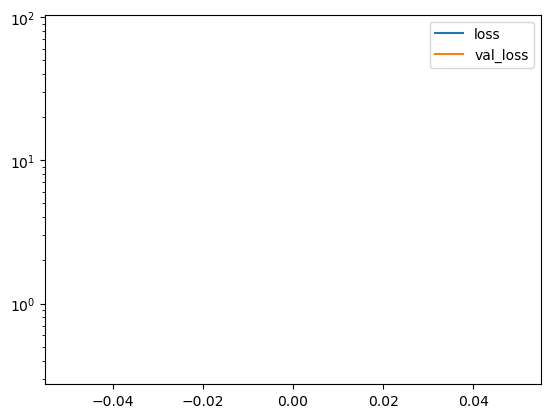

In [48]:
if __name__ == '__main__':
    main()